In [1]:

import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import datetime as dt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
import statistics
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import LabelEncoder
import datetime as dt
import xgboost as xgb

#importing the KSU and MAC season 4 dataset and extracting the cultivars common in both the datasets
fl1=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/KSU/ksu_flowering_2020-04-07T085237.csv" , delimiter=",")
fl1.rename(columns = {'pass':'column', 'value':'days_to_flowering'}, inplace = True)

fl2=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/MAC season 4/Phenotypes/Modified/days_gdd_to_flowering_season_4_2020-03-10T175312.csv" , delimiter=",")
fl2.rename(columns = {'value':'days_to_flowering'}, inplace = True)


In [2]:
#Visualization for flowering data
fl1.loc[:,'set']= 'KSU'
fl2.loc[:,'set']= 'MAC season 4'

In [3]:
#creating environmental features from weather data for MAC season 4. Calculating the mean, minimum and maximum for the variables.

env=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/MAC season 4/Environmental/weather_station_season_4_2019-12-20T190949.csv")
env['date']=pd.to_datetime(env.date)
fl2_date=fl2["date_of_flowering"]

#for mean
tmax = []
tmin = []
rh3 = []
p1=[]
wsm = []
mws = []
gdd = []
for j in range(len(fl2_date)):
    li = (env['date']>= '2017-04-20') & (env['date'] <= fl2_date[j])
    df_1 = env[li]
    tmax.append(df_1['air_temp_max'].mean())
    tmin.append(df_1['air_temp_min'].mean())
    rh3.append(df_1['rh_mean'].mean())
    p1.append(df_1['precip_total'].mean())
    wsm.append(df_1['wind_speed_mean'].mean())
    mws.append(df_1['max_wind_speed'].mean())
    gdd.append(df_1['gdd'].mean())

fl2.insert(1,'temp_max_mean',tmax)
fl2.insert(2,'temp_min_mean',tmin)
fl2.insert(6,'rh_mean_mean',rh3)
fl2.insert(7,'totalpre_mean',p1)
fl2.insert(8,'wspeedmean_mean',wsm)
fl2.insert(12,'maxwind_mean',mws)
fl2.insert(13,'gddmean',gdd)

#for maximum
t1= []
t2= []
r3 = []
p11=[]
wsm1 = []
mws1 = []
gdd1 = []

for j in range(len(fl2_date)):
    li = (env['date']>= '2017-04-20') & (env['date'] <= fl2_date[j])
    df_1 = env[li]
    t1.append(df_1['air_temp_max'].max())
    t2.append(df_1['air_temp_min'].max())
    r3.append(df_1['rh_mean'].max())
    p11.append(df_1['precip_total'].max())
    wsm1.append(df_1['wind_speed_mean'].max())
    mws1.append(df_1['max_wind_speed'].max())
    gdd1.append(df_1['gdd'].max())

fl2.insert(1,'temp_max_max',t1)
fl2.insert(2,'temp_min_max',t2)
fl2.insert(3,'rh_mean_max',r3)
fl2.insert(4,'totalpre_max',p11)
fl2.insert(5,'wspeedmean_max',wsm1)
fl2.insert(6,'maxwind_max',mws1)
fl2.insert(7,'gddmax',gdd1)

#for minimum
t12= []
t22= []
r32 = []
p12=[]
wsm2 = []
mws2 = []
gdd2 = []

for j in range(len(fl2_date)):
    li = (env['date']>= '2017-04-20') & (env['date'] <= fl2_date[j])
    df_1 = env[li]
    t12.append(df_1['air_temp_max'].min())
    t22.append(df_1['air_temp_min'].min())
    r32.append(df_1['rh_mean'].min())
    p12.append(df_1['precip_total'].min())
    wsm2.append(df_1['wind_speed_mean'].min())
    mws2.append(df_1['max_wind_speed'].min())
    gdd2.append(df_1['gdd'].min())

fl2.insert(1,'temp_max_min',t12)
fl2.insert(2,'temp_min_min',t22)
fl2.insert(3,'rh_mean_min',r32)
fl2.insert(4,'totalpre_min',p12)
fl2.insert(5,'wspeedmean_min',wsm2)
fl2.insert(6,'maxwind_min',mws2)
fl2.insert(7,'gddmin',gdd2)


In [4]:
#creating environmental features from weather data for KSU. Calculating the mean, minimum and maximum for the variables.

fl1_date=fl1["date_of_flowering"]
ksw=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/KSU/ashland_bottoms_weather_2016_daily_2020-06-15.csv" , delimiter=",")

ksw['date']=pd.to_datetime(ksw.date)
tmax = []
tmin = []
rh3 = []
p1=[]
wsm = []
mws = []
gdd = []

#for mean
for j in range(len(fl1_date)):
    li = (ksw['date']>= '2016-06-17') & (ksw['date'] <= fl1_date[j])
    df_1 = ksw[li]
    tmax.append(df_1['air_temp_max_C'].mean())
    tmin.append(df_1['air_temp_min_C'].mean())
    rh3.append(df_1['avg_rh'].mean())
    p1.append(df_1['precip_mm'].mean())
    wsm.append(df_1['avg_wind_speed'].mean())
    mws.append(df_1['max_wind_speed'].mean())
    gdd.append(df_1['gdd'].mean())

fl1.insert(1,'temp_max_mean',tmax)
fl1.insert(2,'temp_min_mean',tmin)
fl1.insert(6,'rh_mean_mean',rh3)
fl1.insert(7,'totalpre_mean',p1)
fl1.insert(8,'wspeedmean_mean',wsm)
fl1.insert(12,'maxwind_mean',mws)
fl1.insert(13,'gddmean',gdd)

#for maximum
t1= []
t2= []
r3 = []
p11=[]
wsm1 = []
mws1 = []
gdd1 = []

for j in range(len(fl1_date)):
    li = (ksw['date']>= '2016-06-17') & (ksw['date'] <= fl1_date[j])
    df_1 = ksw[li]
    t1.append(df_1['air_temp_max_C'].max())
    t2.append(df_1['air_temp_min_C'].max())
    r3.append(df_1['avg_rh'].max())
    p11.append(df_1['precip_mm'].max())
    wsm1.append(df_1['avg_wind_speed'].max())
    mws1.append(df_1['max_wind_speed'].max())
    gdd1.append(df_1['gdd'].max())

fl1.insert(1,'temp_max_max',t1)
fl1.insert(2,'temp_min_max',t2)
fl1.insert(3,'rh_mean_max',r3)
fl1.insert(4,'totalpre_max',p11)
fl1.insert(5,'wspeedmean_max',wsm1)
fl1.insert(6,'maxwind_max',mws1)
fl1.insert(7,'gddmax',gdd1)

#for minimum
t12= []
t22= []
r32 = []
p12=[]
wsm2 = []
mws2 = []
gdd2 = []

for j in range(len(fl1_date)):
    li = (ksw['date']>= '2016-06-17') & (ksw['date'] <= fl1_date[j])
    df_1 = ksw[li]
    t12.append(df_1['air_temp_max_C'].min())
    t22.append(df_1['air_temp_min_C'].min())
    r32.append(df_1['avg_rh'].min())
    p12.append(df_1['precip_mm'].min())
    wsm2.append(df_1['avg_wind_speed'].min())
    mws2.append(df_1['max_wind_speed'].min())
    gdd2.append(df_1['gdd'].min())

fl1.insert(1,'temp_max_min',t12)
fl1.insert(2,'temp_min_min',t22)
fl1.insert(3,'rh_mean_min',r32)
fl1.insert(4,'totalpre_min',p12)
fl1.insert(5,'wspeedmean_min',wsm2)
fl1.insert(6,'maxwind_min',mws2)
fl1.insert(7,'gddmin',gdd2)


In [5]:
#creating genetic features. 
dist1=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/gene_cultivar_call.csv")
dist1=dist1.rename(columns={"Unnamed: 0": "cultivar"})
s=dist1['cultivar'].tolist()
dist = dist1.T 
dist.reset_index(level=0, inplace=True)

dist.columns = dist.columns[:1].tolist() + s
dist=dist.rename(columns={"index": "cultivar"})
dist=dist.drop([0])

fl1=fl1.sort_values("cultivar",axis=0, ascending=True)
fl1=pd.merge(fl1, dist, on="cultivar", how='inner')

fl2=fl2.sort_values("cultivar",axis=0, ascending=True)
fl2=pd.merge(fl2, dist, on="cultivar", how='inner')

In [6]:
#creating feature vector and outcome variable
comb= fl1.append(fl2, ignore_index=True)


list1=comb.columns
list2=fl2.columns

d=comb.drop(columns=['cultivar','days_to_flowering', 'set','date_of_flowering','sitename', 'range', 'column', 'lat', 'lon', 'treatment', 'trait',
       'trait_description', 'method_name', 'units', 'date_of_flowering', 'gdd', 'day_of_year'])

X=d.to_numpy()
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

y = comb[['days_to_flowering']]
y = np.asarray(y).flatten()


[16:27:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-error:-71.04
[1]	validation_0-error:-71.04
[2]	validation_0-error:-71.04
[3]	validation_0-error:-71.04
[4]	validation_0-error:-71.04
[5]	validation_0-error:-71.04
[6]	validation_0-error:-71.04
[7]	validation_0-error:-71.04
[8]	validation_0-error:-71.04
[9]	validation_0-error:-71.04
[10]	validation_0-error:-71.04
[11]	validation_0-error:-71.04
[12]	validation_0-error:-71.04
[13]	validation_0-error:-71.04
[14]	validation_0-error:-71.04
[15]	validation_0-error:-71.04
[16]	validation_0-error:-71.04
[17]	validation_0-error:-71.04
[18]	validation_0-error:-71.04
[19]	validation_0-error:-71.04
[20]	validation_0-error:-71.04
[21]	validation_0-error:-71.04
[22]	validation_0-error:-71.04
[23]	validation_0-error:-71.04
[24]	validation_0-error:-71.04
[25]	validation_0-error:-71.04
[26]	validation_0-error:-71.04
[27]	validation_0-error:-71.04
[28]	validation_0-error:-7

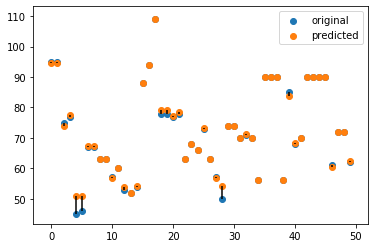

[16:27:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-error:-73.76
[1]	validation_0-error:-73.76
[2]	validation_0-error:-73.76
[3]	validation_0-error:-73.76
[4]	validation_0-error:-73.76
[5]	validation_0-error:-73.76
[6]	validation_0-error:-73.76
[7]	validation_0-error:-73.76
[8]	validation_0-error:-73.76
[9]	validation_0-error:-73.76
[10]	validation_0-error:-73.76
[11]	validation_0-error:-73.76
[12]	validation_0-error:-73.76
[13]	validation_0-error:-73.76
[14]	validation_0-error:-73.76
[15]	validation_0-error:-73.76
[16]	validation_0-error:-73.76
[17]	validation_0-error:-73.76
[18]	validation_0-error:-73.76
[19]	validation_0-error:-73.76
[20]	validation_0-error:-73.76
[21]	validation_0-error:-73.76
[22]	validation_0-error:-73.76
[23]	validation_0-error:-73.76
[24]	validation_0-error:-73.76
[25]	validation_0-error:-73.76
[26]	validation_0-error:-73.76
[27]	validation_0-error:-73.76
[28]	validation_0-error:-7

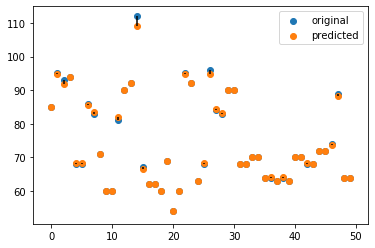

[16:27:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-error:-67.22
[1]	validation_0-error:-67.22
[2]	validation_0-error:-67.22
[3]	validation_0-error:-67.22
[4]	validation_0-error:-67.22
[5]	validation_0-error:-67.22
[6]	validation_0-error:-67.22
[7]	validation_0-error:-67.22
[8]	validation_0-error:-67.22
[9]	validation_0-error:-67.22
[10]	validation_0-error:-67.22
[11]	validation_0-error:-67.22
[12]	validation_0-error:-67.22
[13]	validation_0-error:-67.22
[14]	validation_0-error:-67.22
[15]	validation_0-error:-67.22
[16]	validation_0-error:-67.22
[17]	validation_0-error:-67.22
[18]	validation_0-error:-67.22
[19]	validation_0-error:-67.22
[20]	validation_0-error:-67.22
[21]	validation_0-error:-67.22
[22]	validation_0-error:-67.22
[23]	validation_0-error:-67.22
[24]	validation_0-error:-67.22
[25]	validation_0-error:-67.22
[26]	validation_0-error:-67.22
[27]	validation_0-error:-67.22
[28]	validation_0-error:-6

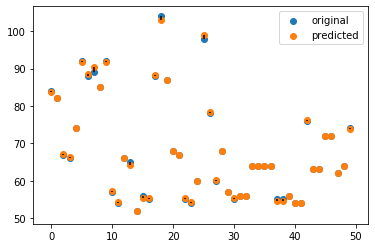

[16:27:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-error:-74.0612
[1]	validation_0-error:-74.0612
[2]	validation_0-error:-74.0612
[3]	validation_0-error:-74.0612
[4]	validation_0-error:-74.0612
[5]	validation_0-error:-74.0612
[6]	validation_0-error:-74.0612
[7]	validation_0-error:-74.0612
[8]	validation_0-error:-74.0612
[9]	validation_0-error:-74.0612
[10]	validation_0-error:-74.0612
[11]	validation_0-error:-74.0612
[12]	validation_0-error:-74.0612
[13]	validation_0-error:-74.0612
[14]	validation_0-error:-74.0612
[15]	validation_0-error:-74.0612
[16]	validation_0-error:-74.0612
[17]	validation_0-error:-74.0612
[18]	validation_0-error:-74.0612
[19]	validation_0-error:-74.0612
[20]	validation_0-error:-74.0612
[21]	validation_0-error:-74.0612
[22]	validation_0-error:-74.0612
[23]	validation_0-error:-74.0612
[24]	validation_0-error:-74.0612
[25]	validation_0-error:-74.0612
[26]	validation_0-error:-74.0612
[27

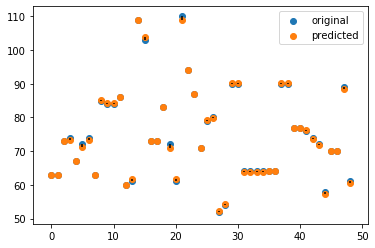

[16:27:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-error:-67.5714
[1]	validation_0-error:-67.5714
[2]	validation_0-error:-67.5714
[3]	validation_0-error:-67.5714
[4]	validation_0-error:-67.5714
[5]	validation_0-error:-67.5714
[6]	validation_0-error:-67.5714
[7]	validation_0-error:-67.5714
[8]	validation_0-error:-67.5714
[9]	validation_0-error:-67.5714
[10]	validation_0-error:-67.5714
[11]	validation_0-error:-67.5714
[12]	validation_0-error:-67.5714
[13]	validation_0-error:-67.5714
[14]	validation_0-error:-67.5714
[15]	validation_0-error:-67.5714
[16]	validation_0-error:-67.5714
[17]	validation_0-error:-67.5714
[18]	validation_0-error:-67.5714
[19]	validation_0-error:-67.5714
[20]	validation_0-error:-67.5714
[21]	validation_0-error:-67.5714
[22]	validation_0-error:-67.5714
[23]	validation_0-error:-67.5714
[24]	validation_0-error:-67.5714
[25]	validation_0-error:-67.5714
[26]	validation_0-error:-67.5714
[27

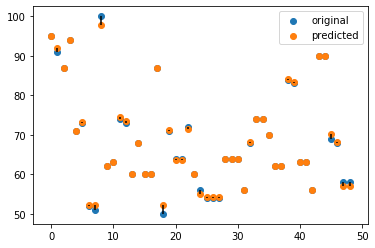

Root Mean square error for 5-fold CV XG: 0.6451354443478623 +- 0.38486376493939933


In [7]:

y = comb[['days_to_flowering']]
y = np.asarray(y).flatten()

ns=5
groups=comb.cultivar
cv =GroupKFold(n_splits=ns)
rmse=0
R2=0
e=[]
for train_index, test_index in cv.split(X,y,groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model=xgb.XGBRegressor()
    xgb.XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.25, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=316,
       n_jobs=2, nthread=None, objective='reg:squarederror',
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
    eval_set=[(X_test,y_test)]
    model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)
    print(model.score(X_train,y_train))
    y_pred=model.predict(X_test)
    predictions=[round(value) for value in y_pred]

    rmse=rmse+math.sqrt(mean_squared_error(y_test, y_pred))
    e.append(math.sqrt(mean_squared_error(y_test, y_pred)))
    x_ax = range(len(y_test))
    plt.scatter(x_ax, y_test, label="original")
    plt.scatter(x_ax, y_pred, label="predicted")
    plt.vlines(x_ax, ymin=y_test, ymax=y_pred, colors='k')
    plt.legend()
    plt.show()

    
std= (statistics.stdev(e))

print('Root Mean square error for 5-fold CV XG:',rmse/ns, '+-', std)

